In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-whitegrid")

In [4]:
# Carga de datos
breast = pd.read_csv(r"C:\Users\Educa informatica\Desktop\CIENCIAS DE DATOS\CSV, EXCELS, ETC\archivos csv\breast-cancer-wisconsin-data.csv", header=None)

## **ANÁLISIS DE DATOS EXPLORATORIO**

In [8]:
# Primera vista de los datos
breast.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Estructura del dataset
def estructura_dataset(df):
    print(f"Cantidad de filas del dataset: {df.shape[0]}")
    print(f"Cantidad de columnas del dataset: {df.shape[1]}")
    print(f"Cantidad total de datos: {df.size}")
    print(f"Columnas: {df.columns}")
    
estructura_dataset(breast)

Cantidad de filas del dataset: 699
Cantidad de columnas del dataset: 11
Cantidad total de datos: 7689
Columnas: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')


In [7]:
# Información del dataset
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Observamos que las columnas no tienen nombres, por lo que pasaremos a darselos.

In [ ]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 
             'Class'] # Provienen de  UCI machine learning

breast.columns = col_names # Renombramos las columnas

breast.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
breast.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


La columna "Id" no nos proporciona datos relevantes para el modelado por lo que la eliminaremos

In [11]:
breast.drop(columns="Id", axis=1, inplace=True)

In [12]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Observamos que tenemos 9 columnas numéricas y 1 categórica. Veamos la frecuencia de valores de cada una.

In [13]:
for col in breast.columns:
    print(breast[col].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

Vemos que en breast.info dice que Bare nuclei es de tipo object, pero cuando observamos las frecuencias es de tipo numérico por lo que lo transformaremos.

In [14]:
breast["Bare_Nuclei"] = pd.to_numeric(breast["Bare_Nuclei"], errors="coerce")

breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
# Presencia de valores nulos

breast.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [16]:
# Variable target
breast["Class"].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [17]:
breast["Class"].value_counts(normalize=True)

Class
2    0.655222
4    0.344778
Name: proportion, dtype: float64

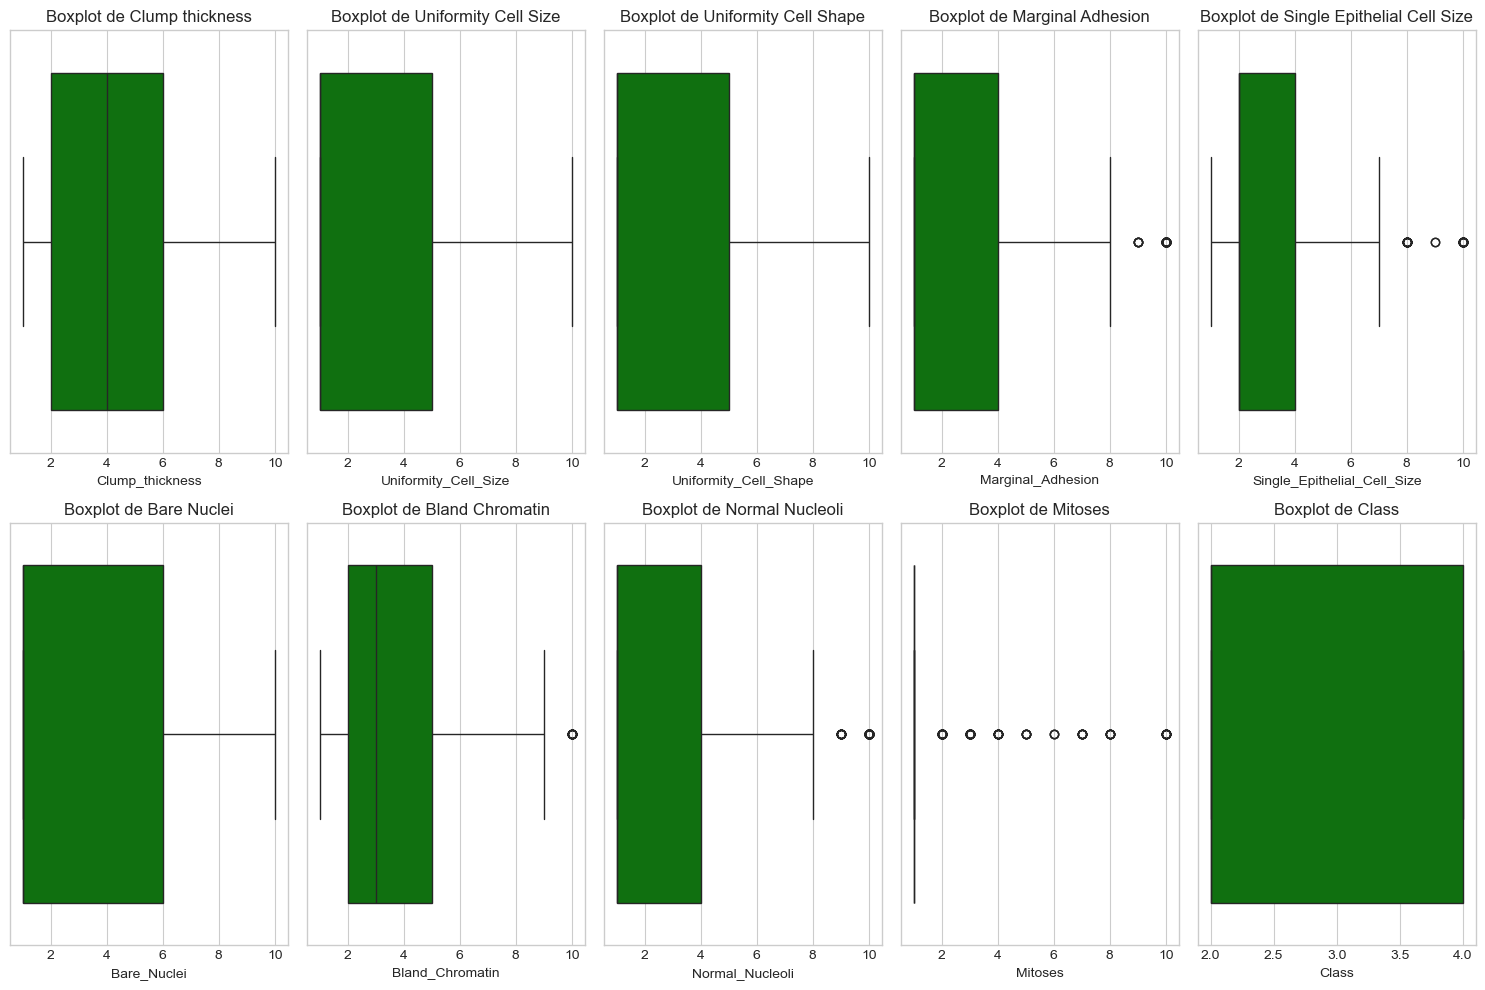

In [113]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(breast.columns):
    ax = axes[i]
    sns.boxplot(data=breast, x=col, color="green", ax=ax)
    ax.set_title(f"Boxplot de {col.replace('_', ' ')}")
    
plt.tight_layout()

plt.show()

En base al repositorio UCI, clase 2 serian benignos y clase 4 serian malignos.

In [19]:
# Presencia de outliers
def detectar_outliers(df, columnas):
    conteo_outliers = {}
    for col in columnas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - iqr * 1.5
        limite_superior = q3 + iqr * 1.5
        
        total_outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        
        conteo_outliers[col] = total_outliers.shape[0]
    
    return conteo_outliers

detectar_outliers(breast, breast.columns)

{'Clump_thickness': 0,
 'Uniformity_Cell_Size': 0,
 'Uniformity_Cell_Shape': 0,
 'Marginal_Adhesion': 60,
 'Single_Epithelial_Cell_Size': 54,
 'Bare_Nuclei': 0,
 'Bland_Chromatin': 20,
 'Normal_Nucleoli': 77,
 'Mitoses': 120,
 'Class': 0}

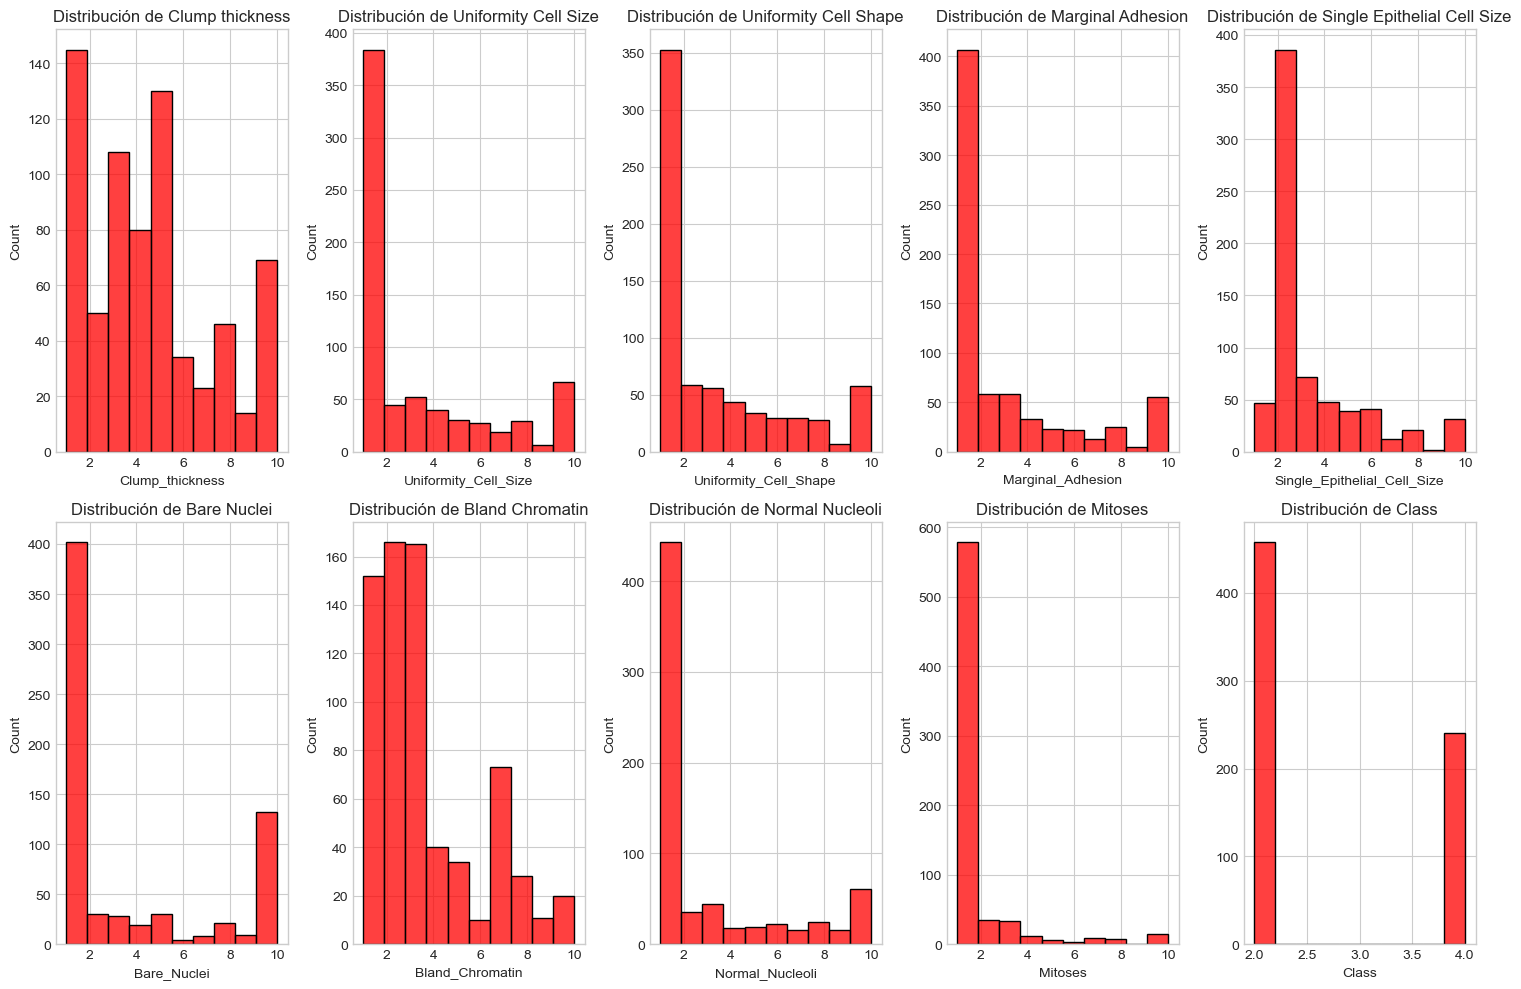

In [30]:
# Distribución de las variables
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(breast.columns):
    ax = axes[i]
    sns.histplot(data=breast, x=col, color="red", edgecolors="k", ax=ax, bins=10)
    ax.set_title(f"Distribución de {col.replace('_', ' ')}")
    
plt.tight_layout()

plt.show()

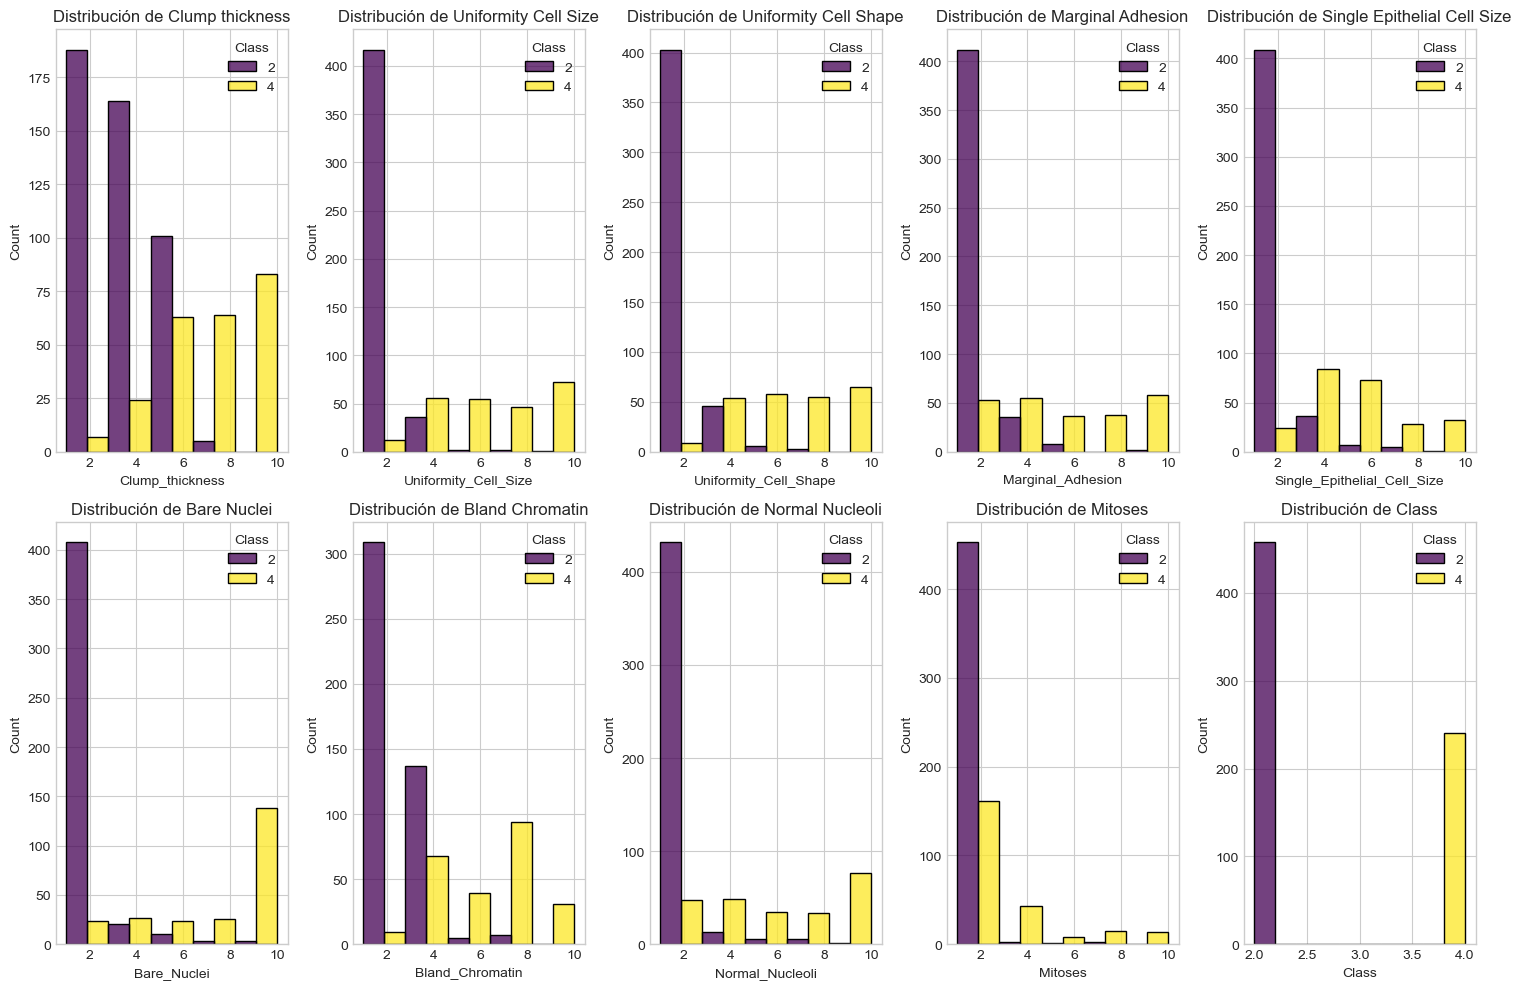

In [119]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(breast.columns):
    ax = axes[i]
    sns.histplot(data=breast, x=col, multiple="dodge", palette="viridis", hue="Class", edgecolors="k", ax=ax, bins=5)
    ax.set_title(f"Distribución de {col.replace('_', ' ')}")
    
plt.tight_layout()

plt.show()

Vemos que todas las variables están sesgadas positivamente (cola a la derecha).

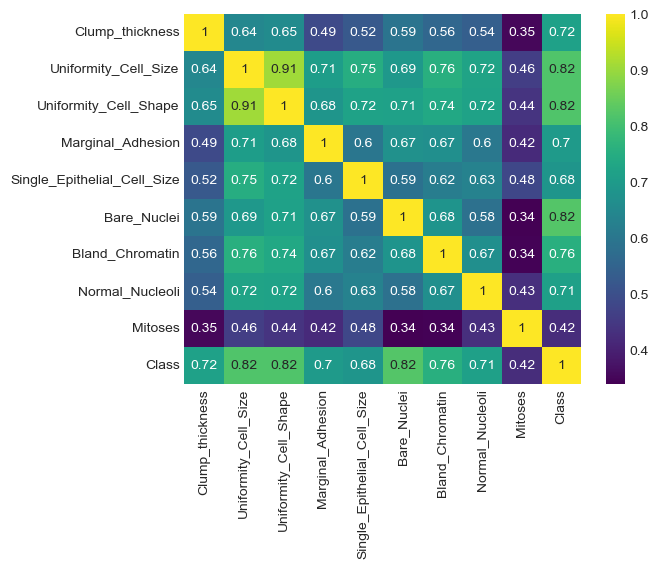

In [31]:
# Correlación de las variables
correlacion = breast.corr()

sns.heatmap(correlacion, annot=True, cmap="viridis")

plt.show()

In [32]:
# Correlación de las caracteristicas con la variable target
correlacion["Class"].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

## **Dividir el dataset en features y target**

In [ ]:
X = breast.drop(columns="Class", axis=1)

y = breast["Class"]

## **Dividir en conjuntos de entrenamiento y prueba**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41, stratify=y)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 9)
(140, 9)
(559,)
(140,)


## **Feature Engineering**

In [ ]:
# Tipos de datos y valores nulos de X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 270 to 691
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              559 non-null    int64  
 1   Uniformity_Cell_Size         559 non-null    int64  
 2   Uniformity_Cell_Shape        559 non-null    int64  
 3   Marginal_Adhesion            559 non-null    int64  
 4   Single_Epithelial_Cell_Size  559 non-null    int64  
 5   Bare_Nuclei                  548 non-null    float64
 6   Bland_Chromatin              559 non-null    int64  
 7   Normal_Nucleoli              559 non-null    int64  
 8   Mitoses                      559 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 43.7 KB


In [ ]:
# Tipos de datos y valores nulos de X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 331 to 42
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              140 non-null    int64  
 1   Uniformity_Cell_Size         140 non-null    int64  
 2   Uniformity_Cell_Shape        140 non-null    int64  
 3   Marginal_Adhesion            140 non-null    int64  
 4   Single_Epithelial_Cell_Size  140 non-null    int64  
 5   Bare_Nuclei                  135 non-null    float64
 6   Bland_Chromatin              140 non-null    int64  
 7   Normal_Nucleoli              140 non-null    int64  
 8   Mitoses                      140 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 10.9 KB


Como vimos anteriormente, el dataset contiene outliers. La medida para llenar los valores nulos correspondiente es la mediana, ya que es robusta a los outliers. Siempre suponiendo que los valores nulos son completamente aleatorios.

In [45]:
# Imputar los valores nulos de X_train y X_test con la mediana de la columna respectiva de X_train
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
# Verificamos la cantidad de valores nulos en X_train
X_train.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [ ]:
# Verificamos la cantidad de valores nulos en X_test
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

## **Feature Scaling**

In [48]:
scaler = StandardScaler()

cols = X_train.columns

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)

X_test = pd.DataFrame(X_test, columns=cols)

In [49]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1.266045,0.291633,1.271837,-0.624338,-0.089460,1.814508,-0.182888,2.076673,0.250092
1,-0.838174,-0.700393,-0.742205,-0.624338,-0.548248,-0.678335,-0.182888,-0.596580,-0.339787
2,0.915342,1.945009,0.264816,2.513567,3.122061,-0.124370,0.628496,0.071733,0.839971
3,-0.487471,-0.369717,-0.406531,-0.275682,-0.548248,-0.678335,-0.182888,-0.262424,-0.339787
4,-1.188878,-0.700393,-0.742205,-0.624338,-0.548248,-0.678335,-0.182888,-0.596580,-0.339787


In [50]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,0.213935,-0.700393,-0.742205,-0.624338,-0.548248,-0.678335,-0.182888,-0.596580,0.250092
1,1.266045,0.291633,0.936163,0.072975,-0.089460,-0.678335,0.222804,0.071733,-0.339787
2,-1.188878,-0.700393,-0.742205,-0.624338,-0.548248,-0.678335,-0.994273,-0.596580,-0.339787
3,-1.188878,-0.700393,-0.070858,-0.624338,-0.548248,-0.678335,-0.994273,-0.596580,-0.339787
4,-1.188878,-0.700393,-0.742205,-0.624338,-0.548248,0.429596,-0.994273,-0.596580,-0.339787


## **Generamos el modelo KNN**

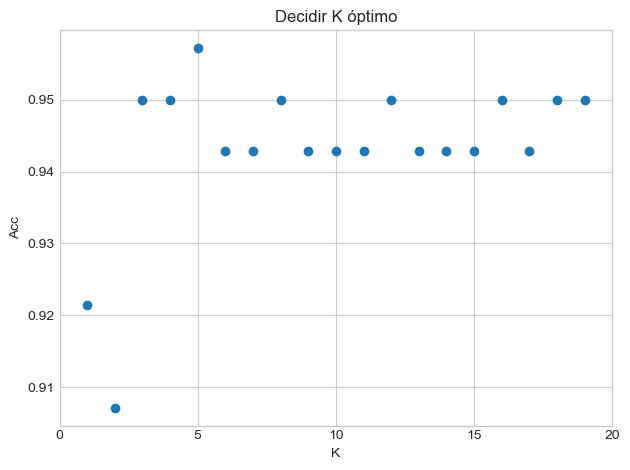

In [54]:
# Obtener el valor óptimo de k
rango = range(1, 20)
inertia = []

for i in rango:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    inertia.append(knn.score(X_test, y_test))
    
plt.scatter(rango, inertia)

plt.title("Decidir K óptimo")
plt.xlabel("K")
plt.ylabel("Acc")
plt.xticks([0, 5, 10, 15, 20])

plt.tight_layout()

plt.show()

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
# Encajar el modelo en el set de entrenamiento
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [67]:
# Probabilidad de obtener clase 2 (benigno)
knn.predict_proba(X_test)[:,0]

array([1. , 0.4, 1. , 1. , 1. , 1. , 1. , 0.2, 0. , 0.4, 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0. , 0. , 0.4, 0. , 1. , 1. , 0. , 1. , 1. ,
       0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.2, 0. ,
       1. , 1. , 0. , 1. , 0.8, 1. , 0. , 1. , 0.8, 1. , 1. , 1. , 0.2,
       0. , 1. , 1. , 1. , 1. , 1. , 1. , 0.2, 1. , 0. , 0.6, 1. , 0. ,
       1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 1. , 1. , 1. , 0. ,
       1. , 1. , 1. , 1. , 0.4, 0.4, 1. , 1. , 1. , 1. , 1. , 0.2, 1. ,
       0.2, 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       0. , 0. , 0. , 0. , 1. , 0.2, 1. , 0.6, 0. , 0. , 1. , 0. , 0.2,
       1. , 0.2, 1. , 0. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 0.2,
       1. , 0. , 0. , 0. , 1. , 0.2, 1. , 0. , 1. , 0. ])

In [68]:
# Probabilidad de obtener clase 4 (maligno)
knn.predict_proba(X_test)[:,1]

array([0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.8, 1. , 0.6, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1. , 1. , 0.6, 1. , 0. , 0. , 1. , 0. , 0. ,
       1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.8, 1. ,
       0. , 0. , 1. , 0. , 0.2, 0. , 1. , 0. , 0.2, 0. , 0. , 0. , 0.8,
       1. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 1. , 0.4, 0. , 1. ,
       0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 1. ,
       0. , 0. , 0. , 0. , 0.6, 0.6, 0. , 0. , 0. , 0. , 0. , 0.8, 0. ,
       0.8, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
       1. , 1. , 1. , 1. , 0. , 0.8, 0. , 0.4, 1. , 1. , 0. , 1. , 0.8,
       0. , 0.8, 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 1. , 0.8,
       0. , 1. , 1. , 1. , 0. , 0.8, 0. , 1. , 0. , 1. ])

### **Accuracy Score**

In [69]:
print(f"Accuracy del modelo: {round(accuracy_score(y_test, y_pred), 4)}")

Accuracy del modelo: 0.9571


In [70]:
# Comparar con el accuracy del set de entrenamiento
y_pred_train = knn.predict(X_train)

print(f"Accuracy de entrenamiento: {round(accuracy_score(y_train, y_pred_train), 4)}")

Accuracy de entrenamiento: 0.9767


El set de entrenamiento da un accuracy de 0.9767 mientras que el de prueba es de 0.9571, valores que son similares por lo que no hay overfitting.

In [71]:
# Probar diferentes valores de K
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    print(f"Accuracy del modelo con k={i}: {round(accuracy_score(y_test, y_pred_i), 4)}")

Accuracy del modelo con k=1: 0.9214
Accuracy del modelo con k=2: 0.9071
Accuracy del modelo con k=3: 0.95
Accuracy del modelo con k=4: 0.95
Accuracy del modelo con k=5: 0.9571
Accuracy del modelo con k=6: 0.9429
Accuracy del modelo con k=7: 0.9429
Accuracy del modelo con k=8: 0.95
Accuracy del modelo con k=9: 0.9429


## **Matriz de confusión**

In [89]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix\n", cm)

print("\n TN = ", cm[0, 0])
print("\n TP = ", cm[1, 1])
print("\n FP = ", cm[0, 1])
print("\n FN = ", cm[1, 0])

Confusion matrix
 [[88  4]
 [ 2 46]]

 TN =  88

 TP =  46

 FP =  4

 FN =  2


La matriz de confusión muestra que 88 + 46 = 134 son predicciones correctas y 4 + 2 = 6 son predicciones incorrectas.
Tenemos 4 errores del tipo 1 (no afecta nuestro paciente) y tenemos 2 errores del tipo 2 (no son muchos, pero son importantes de igual manera).

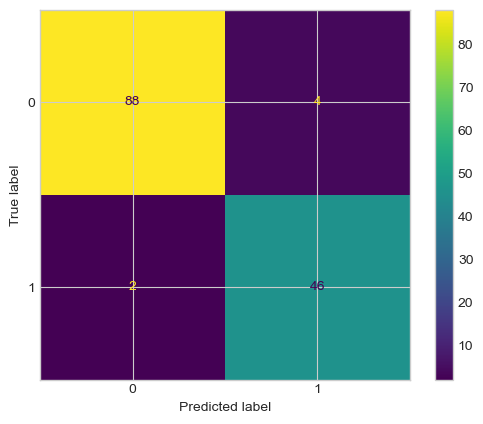

In [ ]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()

plt.show()

## **Reporte de clasificación**

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        92
           4       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



## **ROC AUC**

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")

ROC AUC: 0.9574275362318841


## **CROSS VALIDATION**

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
print(f"Valores de cross validation: {scores}")
print(f"Valor medio de cross validation: {scores.mean()}")

Valores de cross validation: [0.96428571 1.         0.94642857 0.98214286 0.94642857 0.98214286
 0.98214286 0.96428571 0.98214286 0.96363636]
Valor medio de cross validation: 0.9713636363636363


## **PCA**

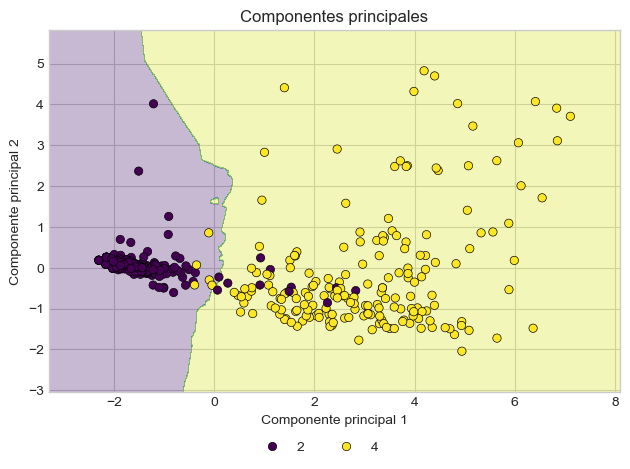

In [109]:
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_train)
knn.fit(X_pca, y_train)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette="viridis", edgecolors="k")
plt.title("Componentes principales")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.legend(frameon=False, bbox_to_anchor=[0.6, -0.1], ncols=3)

plt.tight_layout()

plt.show()

# **CONCLUSIONES**

- En este proyecto, aplicamos KNN como clasificador para clasificar pacientes que padecen de cancer de pecho.
El modelo demuestra buena performance, como indica el accuracy del 0.9571 con k=5.
- Con k=5 el conjunto de entrenamiento otorga un accuracy del 0.9767 mientras que el conjunto de prueba da un 0.9571. Estos valores son muy similares por lo que no hay señales de overfitting.
- Probamos con diferentes valores de k, donde 3, 4 y 8 se acercan al accuracy de 5 pero no lo superan.
- ROC AUC nos da un valor cercano a 1 por lo que el clasificador realiza un buen trabajo en predecir si es un cancer benigno o maligno.
- La validación cruzada nos da valores entre  0.94642857 y 1, y la media de la misma es de 0.9713 por lo que podemos notar una mejora en la performance luego de aplicar CV.